In [ ]:
import pandas as pd
df = pd.read_csv('results/oa_gs_summary_journals_pubyear_wos_sc_countries.csv')
df.head(100000).to_csv('sample2.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   journal         100000 non-null  object 
 1   pub_year        100000 non-null  int64  
 2   wos_category    99972 non-null   object 
 3   country         99784 non-null   object 
 4   n_documents     100000 non-null  int64  
 5   oa_fa_all       100000 non-null  float64
 6   publisher_all   100000 non-null  float64
 7   gold            100000 non-null  float64
 8   hybrid          100000 non-null  float64
 9   delayed         100000 non-null  float64
 10  bronze          100000 non-null  float64
 11  green           100000 non-null  float64
 12  green_only      100000 non-null  float64
 13  fa_all          100000 non-null  float64
 14  fa_only         100000 non-null  float64
 15  institution     100000 non-null  float64
 16  social_network  100000 non-null  float64
 17  harvester  

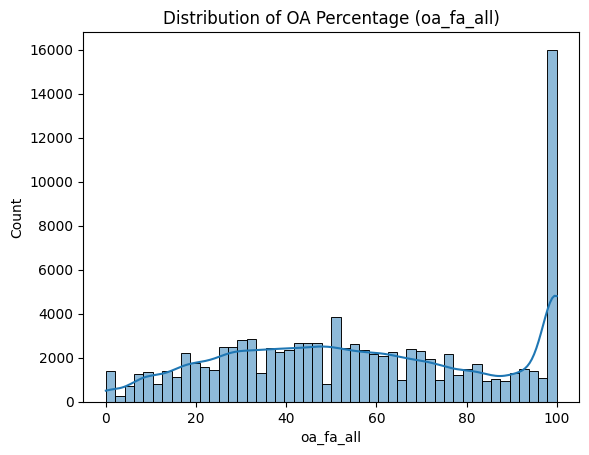

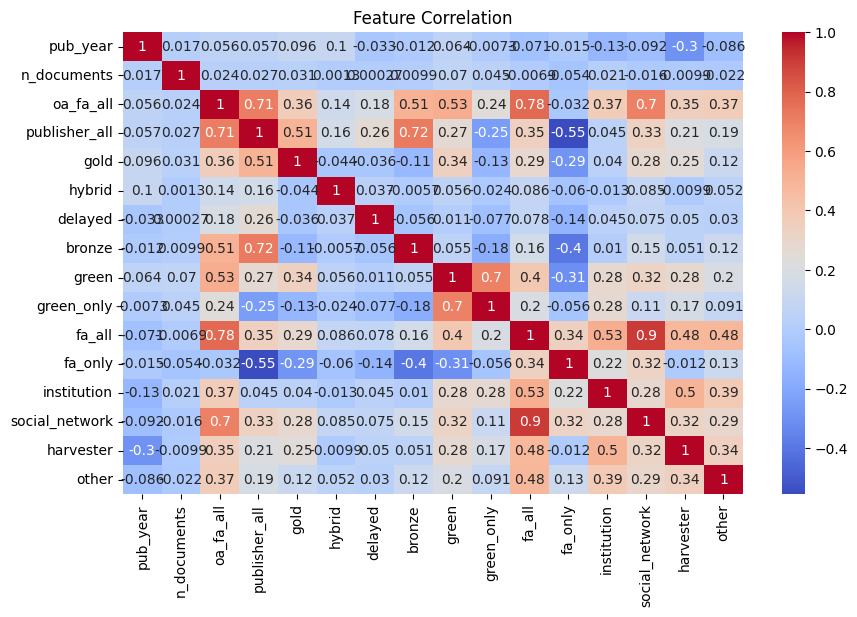

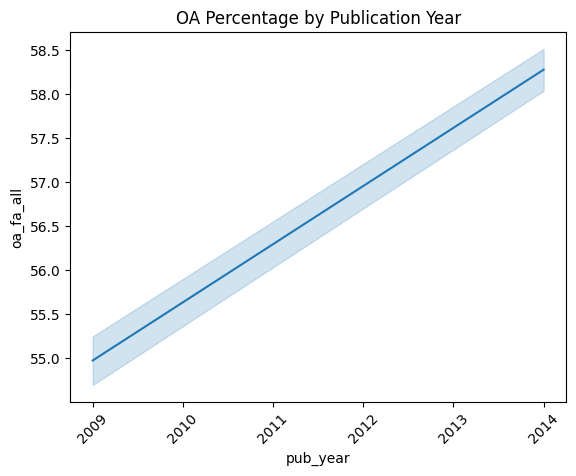


🔢 Decision Tree Regressor Performance:
R² Score: 0.9967897059202904
MAE: 0.4424218123496456

🎯 Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      8526
           1       1.00      1.00      1.00     11426

    accuracy                           1.00     19952
   macro avg       1.00      1.00      1.00     19952
weighted avg       1.00      1.00      1.00     19952


🎯 KNN Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      8526
           1       0.98      0.96      0.97     11426

    accuracy                           0.96     19952
   macro avg       0.96      0.96      0.96     19952
weighted avg       0.96      0.96      0.96     19952



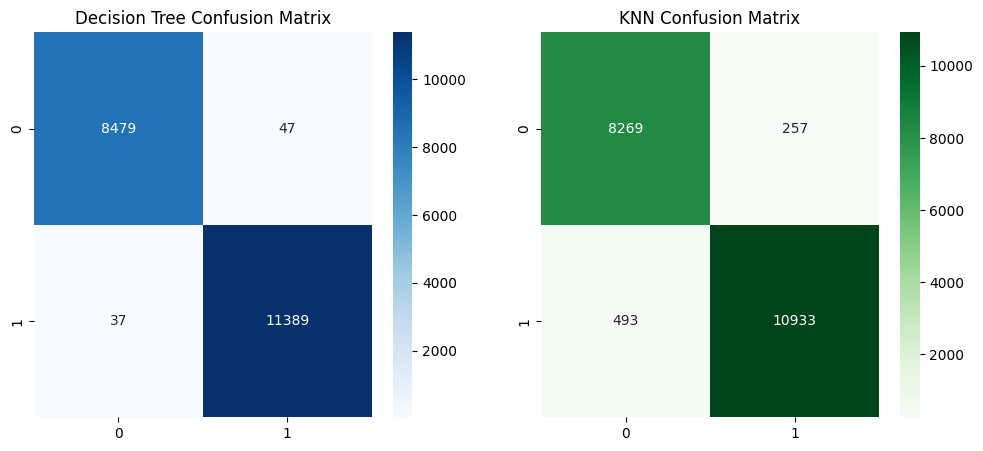

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier

# Load data
df = pd.read_csv("sample2.csv")

# ------------------- EDA -------------------
print(df.info())
print(df.describe())

# Distribution of target
sns.histplot(df['oa_fa_all'], kde=True)
plt.title("Distribution of OA Percentage (oa_fa_all)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

# OA trend over publication years
sns.lineplot(x='pub_year', y='oa_fa_all', data=df)
plt.title("OA Percentage by Publication Year")
plt.xticks(rotation=45)
plt.show()

# ------------------- Data Preprocessing -------------------
# Drop missing rows
df = df.dropna()

# Encode all object columns
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder if needed later

# ------------------- Regression -------------------
X_reg = df.drop(['oa_fa_all'], axis=1)
y_reg = df['oa_fa_all']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor()
regressor.fit(X_train_r, y_train_r)
y_pred_r = regressor.predict(X_test_r)

print("\n🔢 Decision Tree Regressor Performance:")
print("R² Score:", r2_score(y_test_r, y_pred_r))
print("MAE:", mean_absolute_error(y_test_r, y_pred_r))

# ------------------- Classification -------------------
# Bin OA percentage: 1 for High OA (>= 50%), 0 for Low OA
df['oa_label'] = (df['oa_fa_all'] >= 50).astype(int)
X_cls = df.drop(['oa_fa_all', 'oa_label'], axis=1)
y_cls = df['oa_label']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Scale data for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_c)
X_test_scaled = scaler.transform(X_test_c)

# Decision Tree Classifier
tree = DecisionTreeClassifier()
tree.fit(X_train_c, y_train_c)
y_pred_tree = tree.predict(X_test_c)

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train_c)
y_pred_knn = knn.predict(X_test_scaled)

# ------------------- Results -------------------
print("\n🎯 Decision Tree Classification Report:")
print(classification_report(y_test_c, y_pred_tree))

print("\n🎯 KNN Classification Report:")
print(classification_report(y_test_c, y_pred_knn))

# Confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test_c, y_pred_tree), annot=True, fmt='d', ax=ax[0], cmap="Blues")
ax[0].set_title("Decision Tree Confusion Matrix")

sns.heatmap(confusion_matrix(y_test_c, y_pred_knn), annot=True, fmt='d', ax=ax[1], cmap="Greens")
ax[1].set_title("KNN Confusion Matrix")
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   journal         100000 non-null  object 
 1   pub_year        100000 non-null  int64  
 2   wos_category    99972 non-null   object 
 3   country         99784 non-null   object 
 4   n_documents     100000 non-null  int64  
 5   oa_fa_all       100000 non-null  float64
 6   publisher_all   100000 non-null  float64
 7   gold            100000 non-null  float64
 8   hybrid          100000 non-null  float64
 9   delayed         100000 non-null  float64
 10  bronze          100000 non-null  float64
 11  green           100000 non-null  float64
 12  green_only      100000 non-null  float64
 13  fa_all          100000 non-null  float64
 14  fa_only         100000 non-null  float64
 15  institution     100000 non-null  float64
 16  social_network  100000 non-null  float64
 17  harvester  

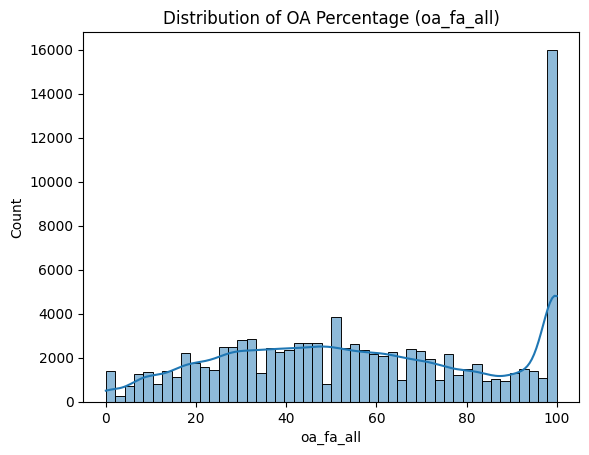

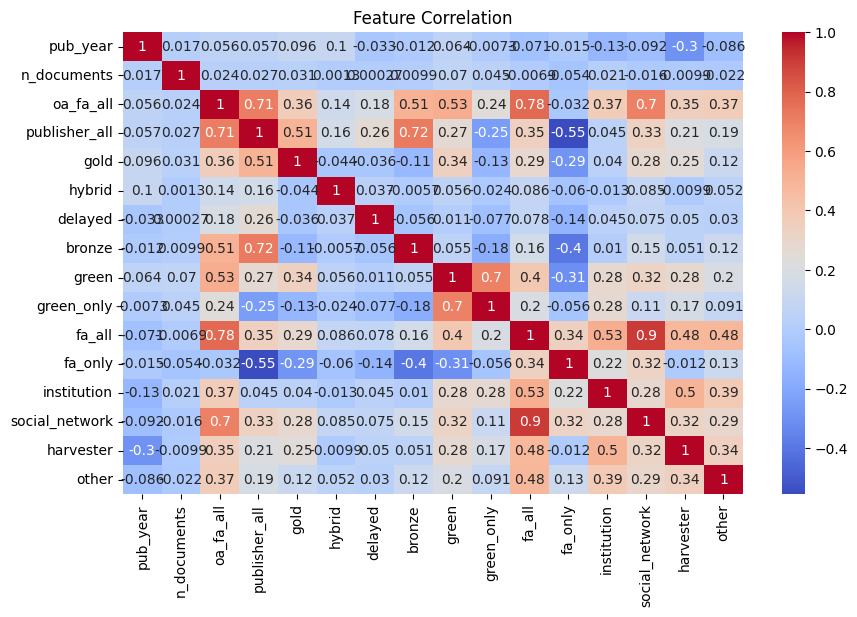

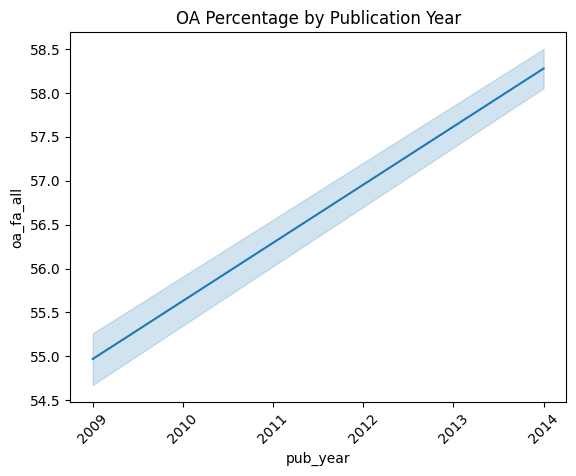


🔢 Decision Tree Regressor Performance:
R² Score: 0.996864323617021
MAE: 0.4406826383320033

🎯 Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8526
           1       1.00      1.00      1.00     11426

    accuracy                           1.00     19952
   macro avg       1.00      1.00      1.00     19952
weighted avg       1.00      1.00      1.00     19952


🎯 KNN Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      8526
           1       0.98      0.96      0.97     11426

    accuracy                           0.96     19952
   macro avg       0.96      0.96      0.96     19952
weighted avg       0.96      0.96      0.96     19952



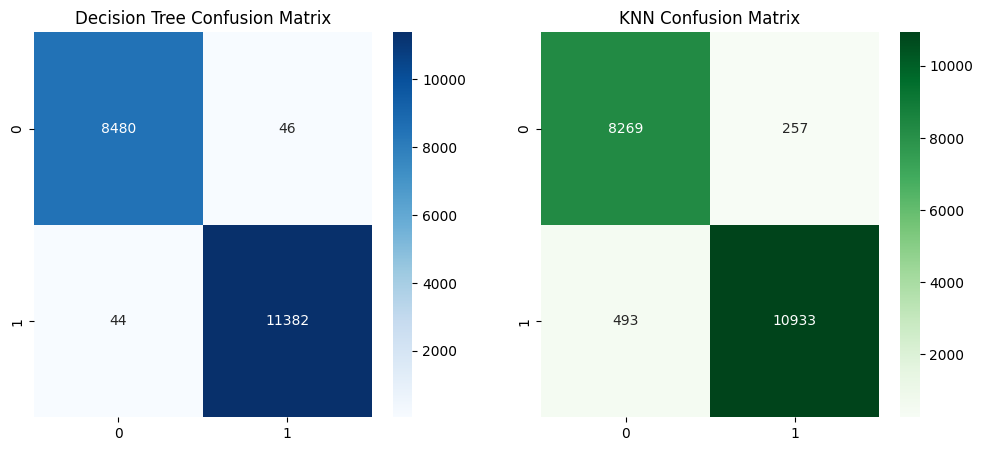

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier

# Load data
df = pd.read_csv("sample2.csv")

# ------------------- EDA -------------------
print(df.info())
print(df.describe())

# Distribution of target
sns.histplot(df['oa_fa_all'], kde=True)
plt.title("Distribution of OA Percentage (oa_fa_all)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

# OA trend over publication years
sns.lineplot(x='pub_year', y='oa_fa_all', data=df)
plt.title("OA Percentage by Publication Year")
plt.xticks(rotation=45)
plt.show()

# ------------------- Data Preprocessing -------------------
# Drop missing rows
df = df.dropna()

# Encode all object columns
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder if needed later

# ------------------- Regression -------------------
X_reg = df.drop(['oa_fa_all'], axis=1)
y_reg = df['oa_fa_all']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor()
regressor.fit(X_train_r, y_train_r)
y_pred_r = regressor.predict(X_test_r)

print("\n🔢 Decision Tree Regressor Performance:")
print("R² Score:", r2_score(y_test_r, y_pred_r))
print("MAE:", mean_absolute_error(y_test_r, y_pred_r))

# ------------------- Classification -------------------
# Bin OA percentage: 1 for High OA (>= 50%), 0 for Low OA
df['oa_label'] = (df['oa_fa_all'] >= 50).astype(int)
X_cls = df.drop(['oa_fa_all', 'oa_label'], axis=1)
y_cls = df['oa_label']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Scale data for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_c)
X_test_scaled = scaler.transform(X_test_c)

# Decision Tree Classifier
tree = DecisionTreeClassifier()
tree.fit(X_train_c, y_train_c)
y_pred_tree = tree.predict(X_test_c)

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train_c)
y_pred_knn = knn.predict(X_test_scaled)

# ------------------- Results -------------------
print("\n🎯 Decision Tree Classification Report:")
print(classification_report(y_test_c, y_pred_tree))

print("\n🎯 KNN Classification Report:")
print(classification_report(y_test_c, y_pred_knn))

# Confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test_c, y_pred_tree), annot=True, fmt='d', ax=ax[0], cmap="Blues")
ax[0].set_title("Decision Tree Confusion Matrix")

sns.heatmap(confusion_matrix(y_test_c, y_pred_knn), annot=True, fmt='d', ax=ax[1], cmap="Greens")
ax[1].set_title("KNN Confusion Matrix")
plt.show()


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier

# Drop missing values
df.dropna(inplace=True)

# Encode categorical variables
le_country = LabelEncoder()
le_category = LabelEncoder()
df['country'] = le_country.fit_transform(df['country'])
df['wos_category'] = le_category.fit_transform(df['wos_category'])

# ---------------- Regression ----------------
X_reg = df.drop(['oa_fa_all'], axis=1)
y_reg = df['oa_fa_all']
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor()
regressor.fit(X_train_r, y_train_r)
y_pred_r = regressor.predict(X_test_r)

regression_results = {
    "R2 Score": r2_score(y_test_r, y_pred_r),
    "MAE": mean_absolute_error(y_test_r, y_pred_r)
}

# ---------------- Classification ----------------
# Create a binary target: 1 if OA ≥ 50%, else 0
df['oa_label'] = (df['oa_fa_all'] >= 50).astype(int)
X_cls = df.drop(['oa_fa_all', 'oa_label'], axis=1)
y_cls = df['oa_label']
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Standardize for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_c)
X_test_scaled = scaler.transform(X_test_c)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_c, y_train_c)
y_pred_dt = dt_classifier.predict(X_test_c)

# KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train_c)
y_pred_knn = knn_classifier.predict(X_test_scaled)

classification_reports = {
    "Decision Tree": classification_report(y_test_c, y_pred_dt, output_dict=True),
    "KNN": classification_report(y_test_c, y_pred_knn, output_dict=True)
}

conf_matrix_dt = confusion_matrix(y_test_c, y_pred_dt)
conf_matrix_knn = confusion_matrix(y_test_c, y_pred_knn)

(regression_results, classification_reports, conf_matrix_dt, conf_matrix_knn)

({'R2 Score': 0.9974301192948763, 'MAE': np.float64(0.39895248596632676)},
 {'Decision Tree': {'0': {'precision': 0.9951866635360413,
    'recall': 0.9942528735632183,
    'f1-score': 0.9947195494015489,
    'support': 8526.0},
   '1': {'precision': 0.9957145355955921,
    'recall': 0.996411692630842,
    'f1-score': 0.9960629921259843,
    'support': 11426.0},
   'accuracy': 0.9954891740176424,
   'macro avg': {'precision': 0.9954505995658167,
    'recall': 0.9953322830970301,
    'f1-score': 0.9953912707637667,
    'support': 19952.0},
   'weighted avg': {'precision': 0.9954889623608422,
    'recall': 0.9954891740176424,
    'f1-score': 0.9954889046826936,
    'support': 19952.0}},
  'KNN': {'0': {'precision': 0.9437343072357909,
    'recall': 0.9698569082805536,
    'f1-score': 0.9566173068024063,
    'support': 8526.0},
   '1': {'precision': 0.9770330652368185,
    'recall': 0.9568527918781726,
    'f1-score': 0.9668376370711002,
    'support': 11426.0},
   'accuracy': 0.9624097834

In [9]:
print(df.columns.tolist())

['journal', 'pub_year', 'wos_category', 'country', 'n_documents', 'oa_fa_all', 'publisher_all', 'gold', 'hybrid', 'delayed', 'bronze', 'green', 'green_only', 'fa_all', 'fa_only', 'institution', 'social_network', 'harvester', 'other', 'oa_label']


$one

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
df = pd.read_csv('results/oa_gs_summary_pubyear_wos_sc_countries.csv')

# Check basic info
print(df.info())
print(df.head())

# Calculate total OA percentage (oa_fa_all) and publisher OA (publisher_all)
# The dataset already contains these percentages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47191 entries, 0 to 47190
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pub_year        47191 non-null  int64  
 1   wos_category    47191 non-null  object 
 2   country         47190 non-null  object 
 3   n_documents     47191 non-null  int64  
 4   oa_fa_all       47191 non-null  float64
 5   publisher_all   47191 non-null  float64
 6   gold            47191 non-null  float64
 7   hybrid          47191 non-null  float64
 8   delayed         47191 non-null  float64
 9   bronze          47191 non-null  float64
 10  green           47191 non-null  float64
 11  green_only      47191 non-null  float64
 12  fa_all          47191 non-null  float64
 13  fa_only         47191 non-null  float64
 14  institution     47191 non-null  float64
 15  social_network  47191 non-null  float64
 16  harvester       47191 non-null  float64
 17  other           47191 non-null 

<Figure size 1200x600 with 0 Axes>

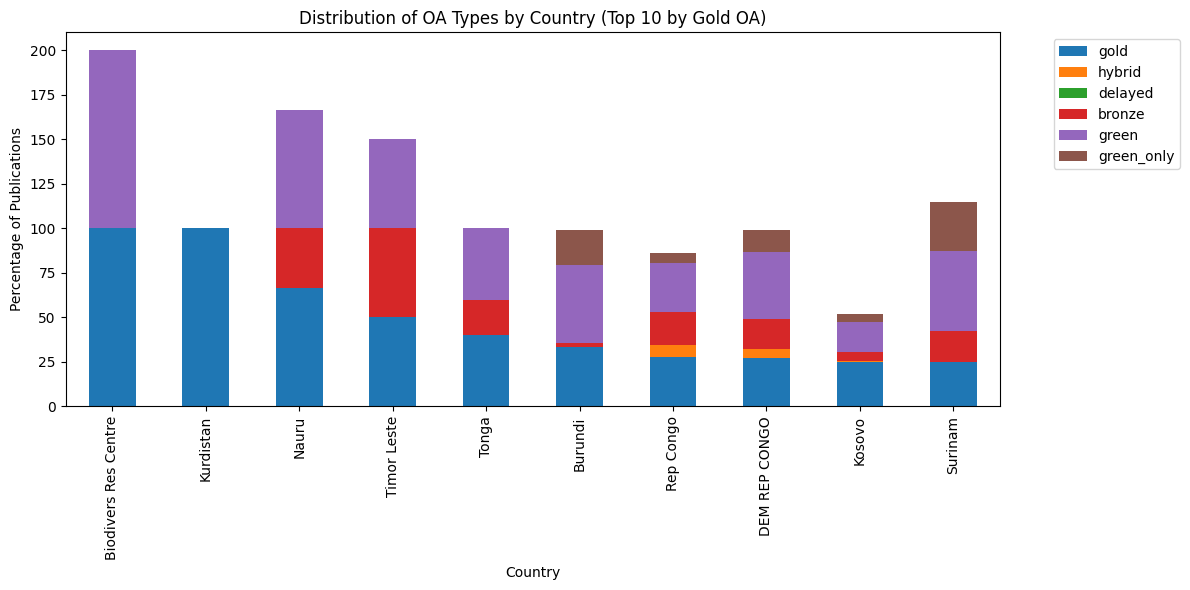

In [11]:
# Aggregate OA types by country
oa_types = ['gold', 'hybrid', 'delayed', 'bronze', 'green', 'green_only']
country_oa = df.groupby('country')[oa_types].mean().sort_values('gold', ascending=False).head(10)

plt.figure(figsize=(12, 6))
country_oa.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Distribution of OA Types by Country (Top 10 by Gold OA)')
plt.ylabel('Percentage of Publications')
plt.xlabel('Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

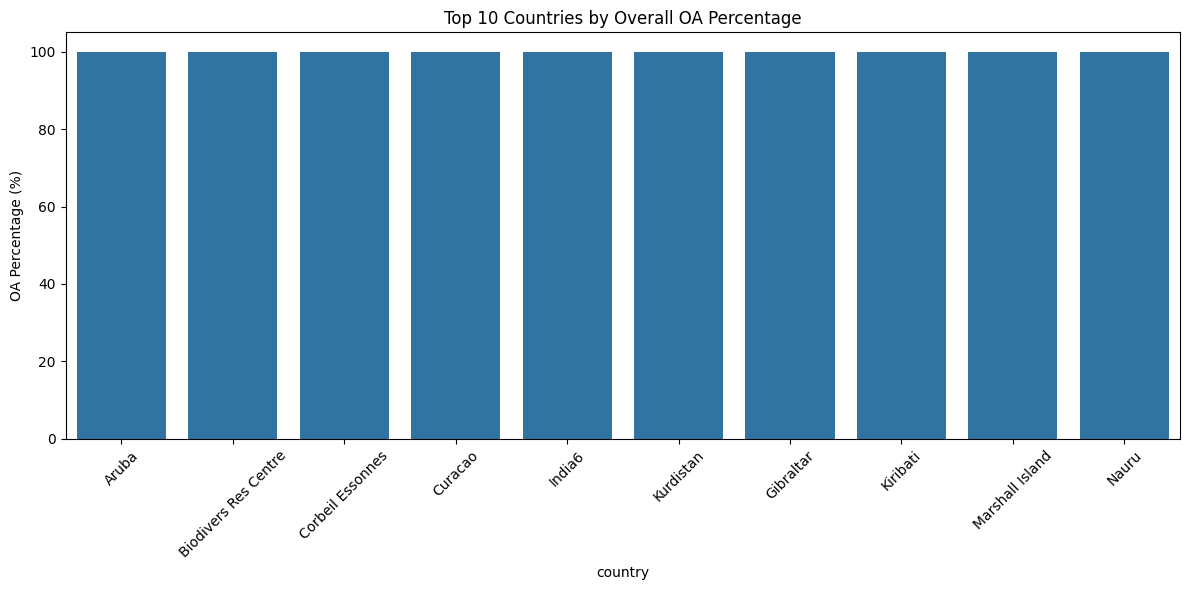

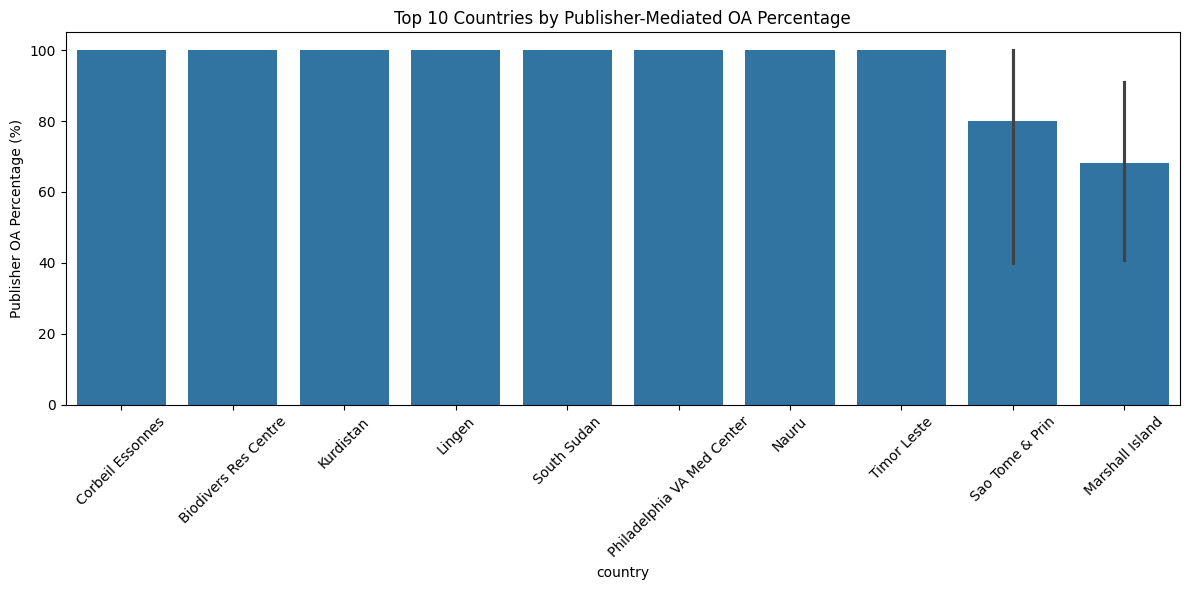

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='country', y='oa_fa_all', 
            order=df.groupby('country')['oa_fa_all'].mean().sort_values(ascending=False).index[:10])
plt.title('Top 10 Countries by Overall OA Percentage')
plt.ylabel('OA Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='country', y='publisher_all', 
            order=df.groupby('country')['publisher_all'].mean().sort_values(ascending=False).index[:10])
plt.title('Top 10 Countries by Publisher-Mediated OA Percentage')
plt.ylabel('Publisher OA Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

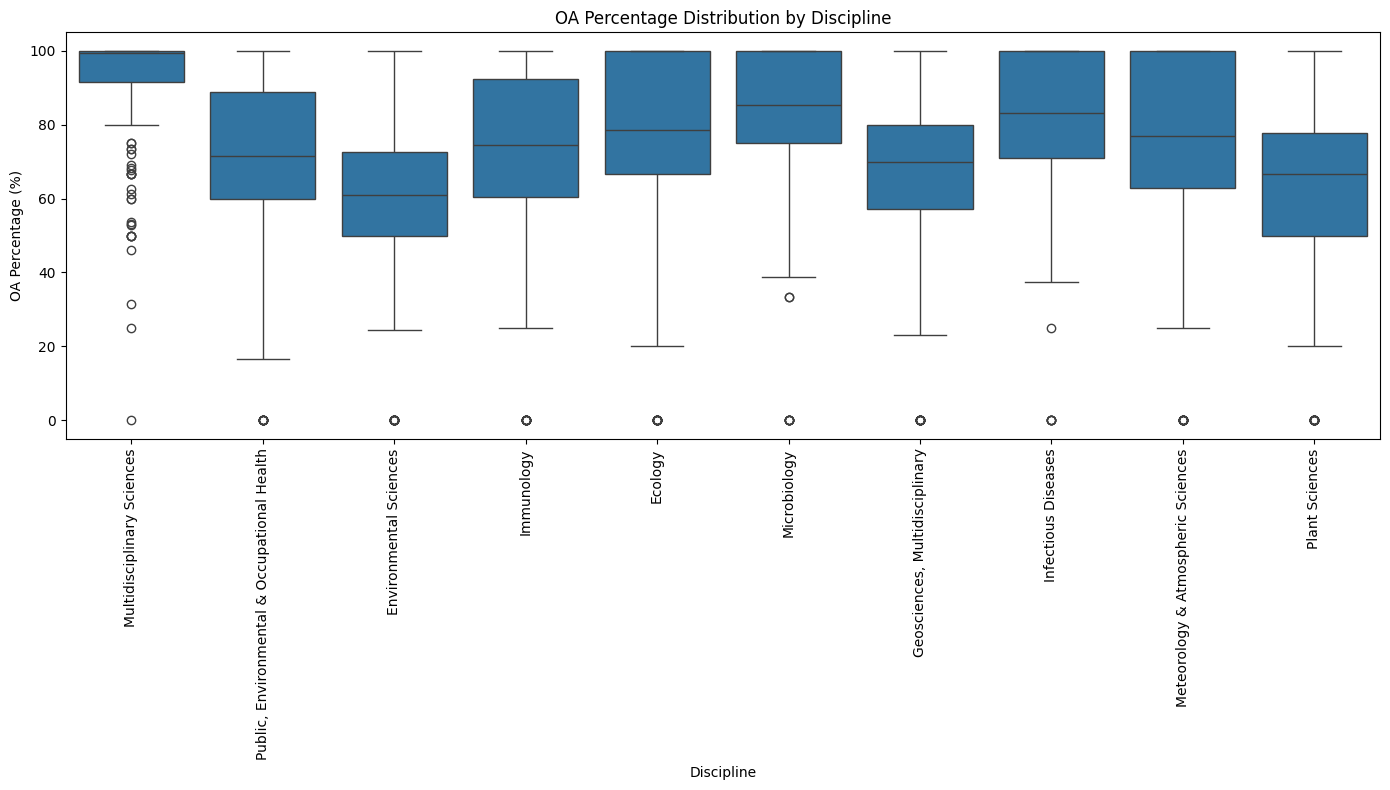

In [13]:
# Top disciplines by publication volume
top_disciplines = df['wos_category'].value_counts().head(10).index.tolist()

plt.figure(figsize=(14, 8))
sns.boxplot(data=df[df['wos_category'].isin(top_disciplines)], 
            x='wos_category', y='oa_fa_all')
plt.title('OA Percentage Distribution by Discipline')
plt.ylabel('OA Percentage (%)')
plt.xlabel('Discipline')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

RMSE: 30.425431841368564
R-squared: 0.06873863752087439


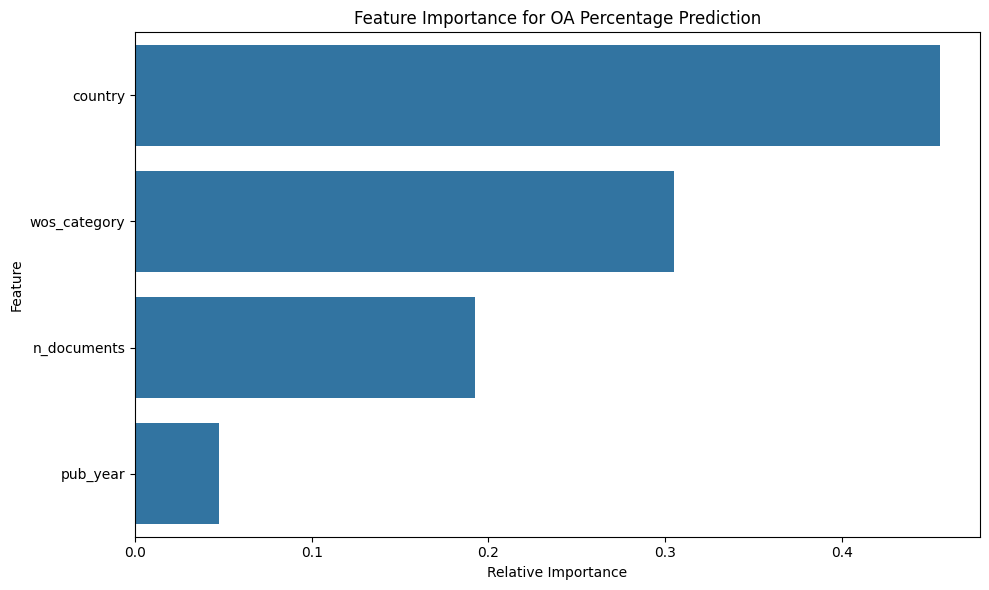

In [14]:
# Prepare data for modeling
# Convert categorical variables to numerical
df_model = df.copy()
df_model['country'] = df_model['country'].astype('category').cat.codes
df_model['wos_category'] = df_model['wos_category'].astype('category').cat.codes

# Features and target
X = df_model[['country', 'wos_category', 'pub_year', 'n_documents']]
y = df_model['oa_fa_all']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R-squared: {r2_score(y_test, y_pred)}")

# Feature importance
feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('Feature Importance for OA Percentage Prediction')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [15]:
# For predicting gold OA percentage
y_gold = df_model['gold']
X_train, X_test, y_train, y_test = train_test_split(X, y_gold, test_size=0.5, random_state=42)

model_gold = RandomForestRegressor(n_estimators=100, random_state=42)
model_gold.fit(X_train, y_train)

y_pred_gold = model_gold.predict(X_test)
print(f"Gold OA RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_gold))}")
print(f"Gold OA R-squared: {r2_score(y_test, y_pred_gold)}")

Gold OA RMSE: 15.186541505175342
Gold OA R-squared: 0.20018645679326208
